In [173]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import calendar
import datetime as dt

In [148]:
#Read data from the required cleaned files
OttBikeRidersDF = pd.read_csv("../data_sets/OTT_BV_2018to2020.csv")
OttCovidDF = pd.read_csv("../data_sets/Ottawa_CovidCases.csv")
VcBikeRidersDF = pd.read_csv("../data_sets/VAC_BV_2018to2020.csv")
VcCovidDF = pd.read_csv("../data_sets/Vancouver_CoivdCases.csv")


### Ottawa - COVID-19 cases vs Number of bikers on road

In [149]:
#Adding month number column and get only data for the year 2020
reqOttBikeRidersDF = OttBikeRidersDF[['Date', 'Day of week', 'Day', 'Month', 'Year', 'Total Bike Volume']].copy()
reqOttBikeRidersDF['Date'] = pd.to_datetime(reqOttBikeRidersDF['Date'])
reqOttBikeRidersDF = reqOttBikeRidersDF.loc[(reqOttBikeRidersDF['Year'] == 2020)] 
reqOttBikeRidersDF['Month Number'] = pd.DatetimeIndex(reqOttBikeRidersDF['Date']).month
reqOttBikeRidersDF

,Date,Day of week,Day,Month,Year,Total Bike Volume,Month Number
730,2020-01-01,Wed,1,Jan,2020,1022.0,1
731,2020-01-02,Thu,2,Jan,2020,1535.0,1
732,2020-01-03,Fri,3,Jan,2020,1649.0,1
733,2020-01-04,Sat,4,Jan,2020,1044.0,1
734,2020-01-05,Sun,5,Jan,2020,998.0,1
...,...,...,...,...,...,...,...
1091,2020-12-27,Sun,27,Dec,2020,1965.0,12
1092,2020-12-28,Mon,28,Dec,2020,1376.0,12
1093,2020-12-29,Tue,29,Dec,2020,2005.0,12
1094,2020-12-30,Wed,30,Dec,2020,1387.0,12


In [150]:
#Get the data grouped by month
bikeDF = reqOttBikeRidersDF.groupby('Month Number').agg(BikeVolume = ('Total Bike Volume', sum), Month = ('Month', 'first')) 
bikeDF

,BikeVolume,Month
Month Number,,
1,49956.0,Jan
2,45200.0,Feb
3,75743.0,Mar
4,152639.0,Apr
5,326314.0,May
6,362471.0,Jun
7,338156.0,Jul
8,296030.0,Aug
9,249331.0,Sep


In [185]:
#Add an empty row for Jan to keep month column consistent with other datasets
OttCovidDF.loc[493] = ['2020-01-01', 0, 0, 2020 ,1, 1, 'Wednesday','Jan']
#Add month name to the dataframe
OttCovidDF['Month Name'] = OttCovidDF['Month'].apply(lambda x: calendar.month_abbr[x])

In [214]:
#Get the data grouped by month
OttGroupedCovidDF = OttCovidDF.loc[OttCovidDF['Year'] == 2020].groupby('Month').agg(TotalCases = ('Daily_Cases_by_Reported_Date' , sum), MonthName = ('Month Name', 'first'))
OttGroupedCovidDF

,TotalCases,MonthName
Month,,
1,0.0,Jan
2,0.0,Feb
3,243.0,Mar
4,1185.0,Apr
5,526.0,May
6,145.0,Jun
7,444.0,Jul
8,430.0,Aug
9,1469.0,Sep


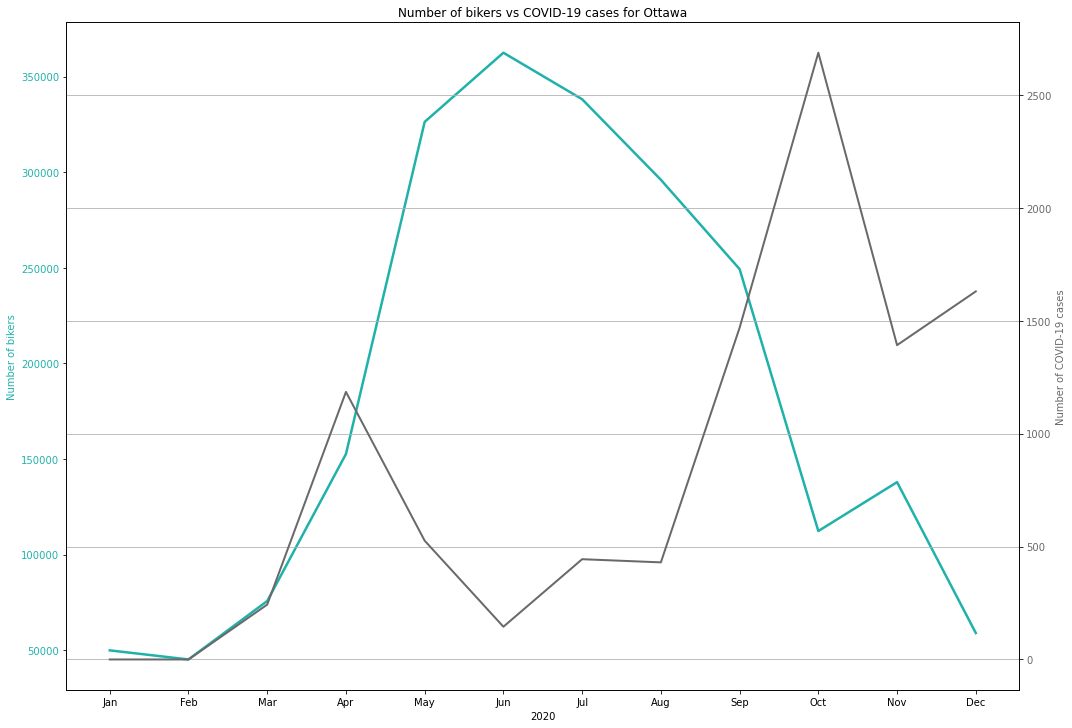

In [253]:
#plotting lines for the covid cases and number of bikers
fig, ax1 = plt.subplots()

color = 'lightseagreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bikers', color=color)
ax1.plot(bikeDF['Month'], bikeDF['BikeVolume'], color=color, linewidth=2.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(OttGroupedCovidDF['MonthName'], OttGroupedCovidDF['TotalCases'], color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of bikers vs COVID-19 cases for Ottawa')
plt.grid()
plt.show()

The correlation coefficient for bike volume and covid cases is -0.19


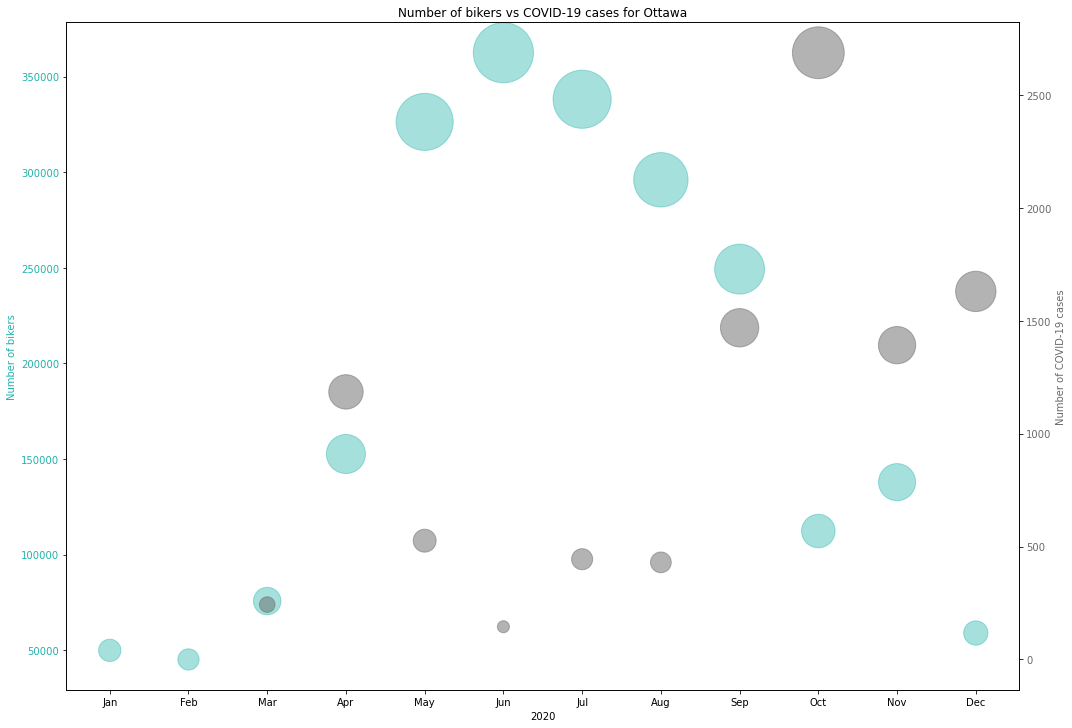

In [254]:
#Scatter plot for covid cases and number of bikers
x = bikeDF['BikeVolume']
y= OttGroupedCovidDF['TotalCases']
correlation = st.pearsonr(bikeDF['BikeVolume'], OttGroupedCovidDF['TotalCases'])
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

fig, ax1 = plt.subplots()

color = 'lightseagreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bikers', color=color)
ax1.scatter(bikeDF['Month'], bikeDF['BikeVolume'], color=color, s=bikeDF['BikeVolume']/100, alpha=0.4)
#ax1.plot(bikeDF['Month'], bikeDF['BikeVolume'], color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(OttGroupedCovidDF['MonthName'], OttGroupedCovidDF['TotalCases'], color=color, s=OttGroupedCovidDF['TotalCases'], alpha=0.5)
#ax2.plot(newDF['MonthName'], newDF['TotalCases'], color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Number of bikers vs COVID-19 cases for Ottawa')
plt.show()

The correlation coefficient for bike volume and covid cases is -0.19. 
This implies that there is no relationship between COVID-19 cases and bike riders on road for Ottawa. 

### Vancouver - COVID-19 cases vs Number of bikers on road 

In [191]:
reqVcBikerDF = VcBikeRidersDF[['Date', 'Month-NonNumeric', 'Month', 'Year', 'Numeric Date', 'Total Bike Volume']]
reqVcBikerDF

,Date,Month-NonNumeric,Month,Year,Numeric Date,Total Bike Volume
0,"August 1, 2018",August,8,2018,2018-08-01,69355
1,"August 2, 2018",August,8,2018,2018-08-02,59321
2,"August 3, 2018",August,8,2018,2018-08-03,50068
3,"August 4, 2018",August,8,2018,2018-08-04,68705
4,"August 5, 2018",August,8,2018,2018-08-05,61651
...,...,...,...,...,...,...
879,"December 27, 2020",December,12,2020,2020-12-27,7073
880,"December 28, 2020",December,12,2020,2020-12-28,22423
881,"December 29, 2020",December,12,2020,2020-12-29,10505
882,"December 30, 2020",December,12,2020,2020-12-30,4297


In [197]:
Vc2020BikeDF = reqVcBikerDF.loc[reqVcBikerDF['Year'] == 2020].groupby('Month').agg(BikeVolume = ('Total Bike Volume', sum), MonthName = ('Month-NonNumeric', 'first'))
Vc2020BikeDF

,BikeVolume,MonthName
Month,,
1,318295,January
2,527736,February
3,806655,March
4,1064972,April
5,1328537,May
6,1242623,June
7,1610860,July
8,1593073,August
9,1090049,September


In [193]:
VcCovidDF['Month Name'] = VcCovidDF['Month'].apply(lambda x: calendar.month_abbr[x])

In [199]:
Vc2020CovidDF = VcCovidDF.loc[VcCovidDF['Year'] == 2020].groupby('Month').agg(TotalCases = ('Cases_Reported', sum), MonthName = ('Month Name', 'first'))
Vc2020CovidDF

,TotalCases,MonthName
Month,,
1,0,Jan
2,1,Feb
3,357,Mar
4,256,Apr
5,53,May
6,66,Jun
7,139,Jul
8,676,Aug
9,1095,Sep


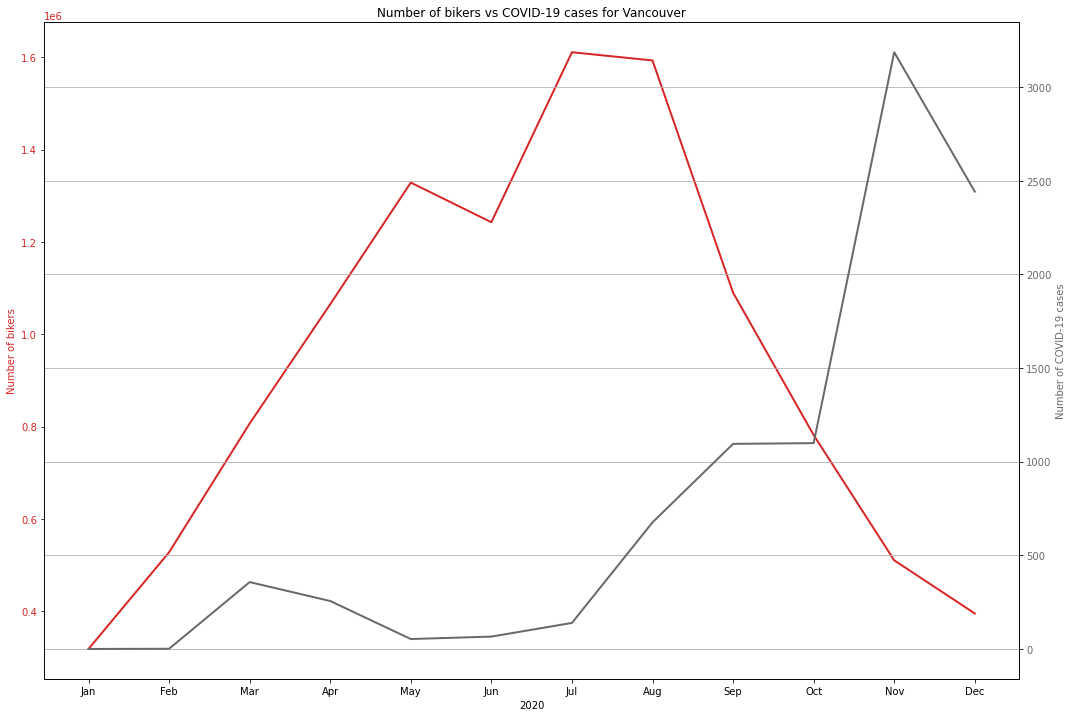

In [258]:
#plotting lines for the covid cases and number of bikers
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bikers', color=color)
ax1.plot(Vc2020BikeDF['MonthName'], Vc2020BikeDF['BikeVolume'], color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(Vc2020CovidDF['MonthName'], Vc2020CovidDF['TotalCases'], color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('Number of bikers vs COVID-19 cases for Vancouver')
plt.grid()
plt.show()

The correlation coefficient for bike volume and covid cases is -0.18


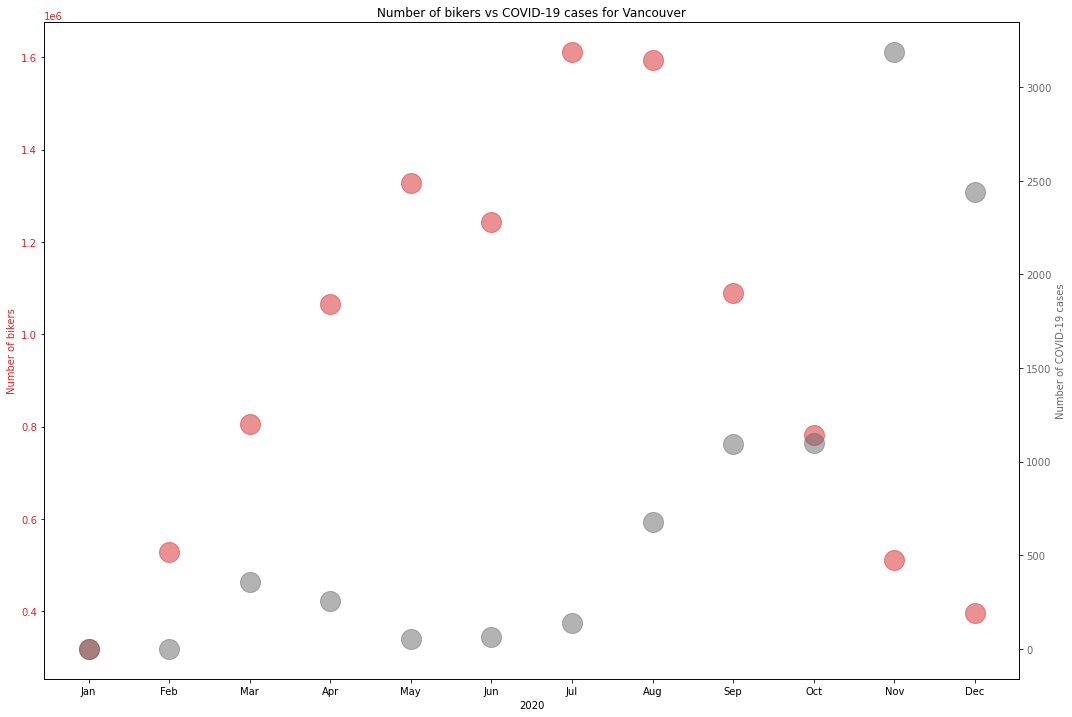

In [265]:
#Scatter plot for covid cases and number of bikers
x = Vc2020BikeDF['BikeVolume']
y= OttGroupedCovidDF['TotalCases']
correlation = st.pearsonr(Vc2020BikeDF['BikeVolume'], OttGroupedCovidDF['TotalCases'])
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bikers', color=color)
ax1.scatter(Vc2020BikeDF['MonthName'], Vc2020BikeDF['BikeVolume'], color=color, s=400, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(Vc2020CovidDF['MonthName'], Vc2020CovidDF['TotalCases'], color=color, s=400, alpha=0.5)

ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  

plt.title('Number of bikers vs COVID-19 cases for Vancouver')
plt.show()

The correlation coefficient for bike volume and covid cases is -0.18. This implies that there is no relationship between COVID-19 cases and bike riders on road for Vancouver.

## Ottawa - COVID-19 cases vs bike thefts

In [212]:
OttawaBikeTheft = pd.read_csv("../data_sets/o_theft_clean.csv")
OttawaBikeTheft['Incident_StartDate'] = pd.to_datetime(OttawaBikeTheft['Incident_StartDate'])
OttawaBikeTheft['Month Name'] = OttawaBikeTheft['MONTH'].apply(lambda x: calendar.month_abbr[x])
OttawaBikeTheft                              

,Incident_StartDate,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG,Month Name
0,2018-05-17,2018,5,17,Thursday,362989.6811,5015885.441,45.283108,-76.746999,May
1,2018-06-15,2018,6,15,Friday,363095.6819,5015986.442,45.284038,-76.745676,Jun
2,2018-09-20,2018,9,20,Thursday,362193.6729,5014083.423,45.266740,-76.756644,Sep
3,2019-05-06,2019,5,6,Monday,362524.6789,5016024.441,45.284268,-76.752964,May
4,2019-05-13,2019,5,13,Monday,362132.6740,5014518.427,45.270641,-76.757542,May
...,...,...,...,...,...,...,...,...,...,...
3336,2019-06-18,2019,6,18,Tuesday,375194.7321,5032311.570,45.433183,-76.595587,Jun
3337,2018-07-17,2018,7,17,Tuesday,364100.6819,5014888.478,45.274354,-76.732566,Jul
3338,2019-06-03,2019,6,3,Monday,366093.7041,5015071.682,45.276385,-76.707218,Jun
3339,2018-10-09,2018,10,9,Tuesday,369820.7101,5032646.585,45.435217,-76.664352,Oct


In [213]:
#Get the theft data grouped by month for year 2020
OttTheftDF = OttawaBikeTheft.loc[OttawaBikeTheft['YEAR'] == 2020].groupby('MONTH').agg(Thefts = ('DAY', 'count'), MonthName = ('Month Name', 'first'))
OttTheftDF

,Thefts,MonthName
MONTH,,
1,13,Jan
2,7,Feb
3,23,Mar
4,69,Apr
5,76,May
6,134,Jun
7,177,Jul
8,144,Aug
9,121,Sep


The correlation coefficient for bike volume and covid cases is 0.15


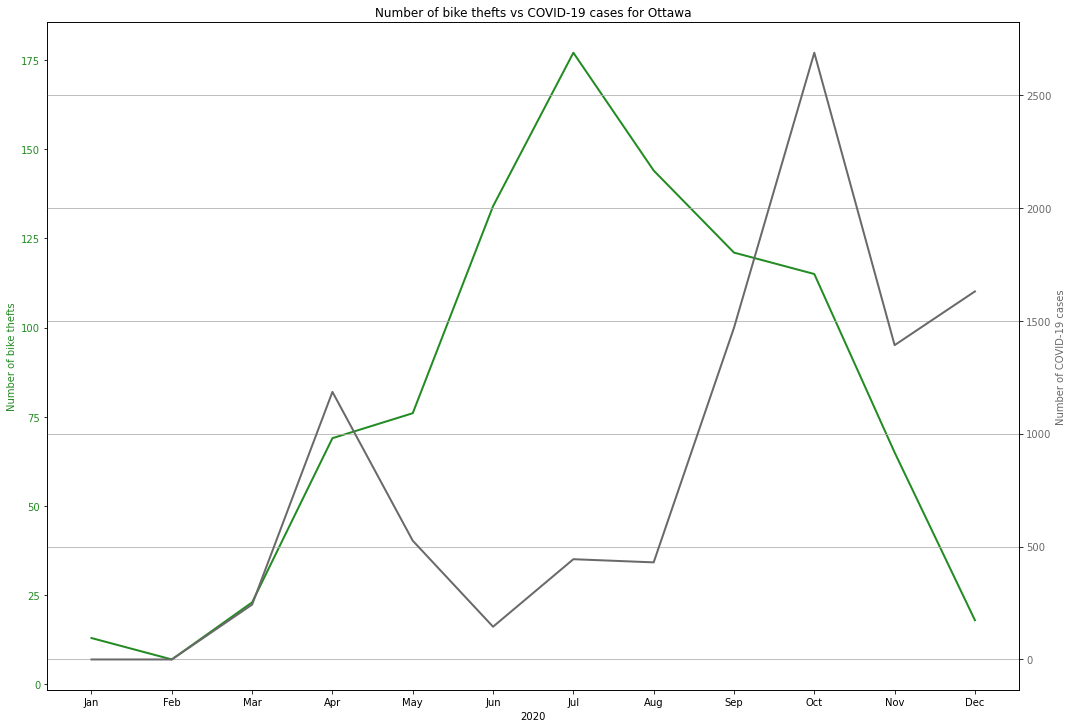

In [246]:
#plotting lines for the covid cases and number of bike thefts
#calculate the correlation
correlation = st.pearsonr(OttTheftDF['Thefts'], OttGroupedCovidDF['TotalCases'])
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

fig, ax1 = plt.subplots()

color = 'forestgreen'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bike thefts', color=color)
ax1.plot(OttTheftDF['MonthName'], OttTheftDF['Thefts'], color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(OttGroupedCovidDF['MonthName'], OttGroupedCovidDF['TotalCases'], color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('Number of bike thefts vs COVID-19 cases for Ottawa')
plt.grid()
plt.show()

The correlation coefficient for bike volume and covid cases is 0.15. This implies that there is no relationship between COVID-19 cases and bike thefts for Ottawa.

## Vancouver - COVID-19 cases vs bike thefts

In [225]:
VanBikeThefts = pd.read_csv("..//data_sets/v_theft_clean.csv")
VanBikeThefts['Incident_Date'] = pd.to_datetime(VanTheftDF['Incident_Date'])
VanBikeThefts['Month Name'] = VanBikeThefts['MONTH'].apply(lambda x: calendar.month_abbr[x])
VanBikeThefts

,Incident_Date,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG,Month Name
0,2018-07-29,2018,7,29,Sunday,491104.2910,5.459077e+06,49.284384,-123.122320,Jul
1,2019-08-05,2019,8,5,Monday,490847.1395,5.458873e+06,49.282539,-123.125851,Aug
2,2019-09-12,2019,9,12,Thursday,490863.9836,5.458842e+06,49.282263,-123.125618,Sep
3,2018-06-03,2018,6,3,Sunday,490903.5756,5.458801e+06,49.281892,-123.125073,Jun
4,2018-06-05,2018,6,5,Tuesday,490903.5756,5.458801e+06,49.281892,-123.125073,Jun
...,...,...,...,...,...,...,...,...,...,...
6363,2020-12-05,2020,12,5,Saturday,492368.7112,5.457399e+06,49.269308,-123.104901,Dec
6364,2018-09-25,2018,9,25,Tuesday,492304.6893,5.453646e+06,49.235540,-123.105709,Sep
6365,2019-04-30,2019,4,30,Tuesday,492369.6640,5.456889e+06,49.264717,-123.104878,Apr
6366,2019-02-22,2019,2,22,Friday,492412.6782,5.458757e+06,49.281517,-123.104323,Feb


In [226]:
#Get the theft data grouped by month for year 2020
VanTheftDF = VanBikeThefts.loc[VanBikeThefts['YEAR'] == 2020].groupby('MONTH').agg(Thefts = ('DAY', 'count'), MonthName = ('Month Name', 'first'))
VanTheftDF

,Thefts,MonthName
MONTH,,
1,67,Jan
2,97,Feb
3,108,Mar
4,171,Apr
5,148,May
6,197,Jun
7,243,Jul
8,268,Aug
9,249,Sep


The correlation coefficient for bike volume and covid cases is -0.13


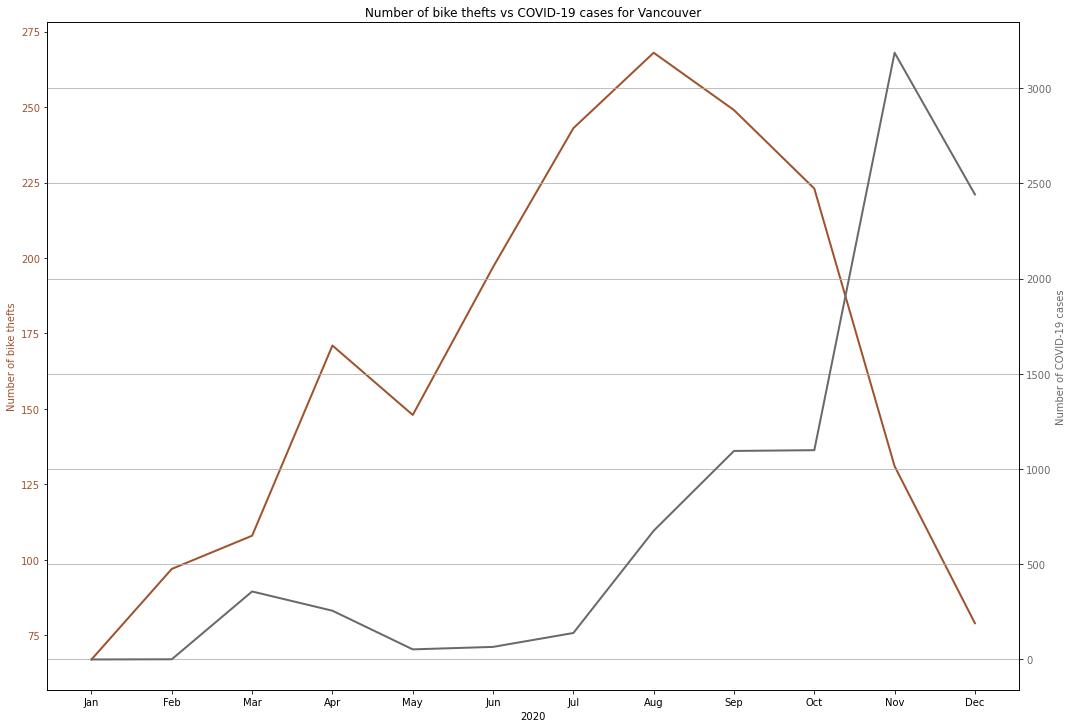

In [264]:
#calculate the correlation
correlation = st.pearsonr(VanTheftDF['Thefts'], Vc2020CovidDF['TotalCases'])
print(f"The correlation coefficient for bike volume and covid cases is {round(correlation[0],2)}")

#plotting lines for the covid cases and number of bike thefts
fig, ax1 = plt.subplots()

color = 'sienna'
ax1.set_xlabel('2020')
ax1.set_ylabel('Number of bike thefts', color=color)
ax1.plot(VanTheftDF['MonthName'], VanTheftDF['Thefts'], color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'dimgray'
ax2.set_ylabel('Number of COVID-19 cases', color=color)  # we already handled the x-label with ax1
ax2.plot(Vc2020CovidDF['MonthName'], Vc2020CovidDF['TotalCases'], color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.title('Number of bike thefts vs COVID-19 cases for Vancouver')
plt.grid()
plt.show()

The correlation coefficient for bike volume and covid cases is -0.13. This implies that there is no relationship between COVID-19 cases and bike thefts for Vancouver.